# **COST DRIVERS IN HEALTHCARE AND FACTORS AFFECTING OUTCOMES OF TREATMENT**

**PROBLEM STATEMENT**:
Healthcare facilities face rising treatment costs and inconsistent patient outcomes across various medical conditions and care settings. However, the specific cost drivers within treatment pathways and their direct impact on clinical outcomes remain unclear. This problem requires an analysis of how treatment decisions, resource use, and care settings influence both healthcare spending and patient health outcomes.

**OBJECTIVES**

1.   Analyze patient billing data
2.   Recommend measures to reduce cost
3.   Assess relationship between test results
      other variables
4.   Identify risk factors associated with  poor results


**RESEARCH QUESTIONS**


1.   Do medical conditions affect billing amount?
2.   Does healthcare facilty influence billing amount?

3.   Does type of admission affect billing amount?
4.   Which demographic group incur higher medical expense?


5.   What recommendations can be made to reduce treatment cost?
6.   Does medical condition, medication, age, length of hospital stay influence test
results?


7.   Are certain medical conditions more prone to poor test outcomes?







In [86]:
#load the toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print('Core toolkit loaded')

Core toolkit loaded


In [87]:
#load the data set and assign to a variable
df = pd.read_csv('medical_data.csv')
df

Patient_ID              Name  Age Medical_Condition Date_of_Admission  \
0      PAT117531      Kelly Martin   18     Asthma Attack     01-01-22 0:20   
1      PAT120151      Mark Barrett   34          Migraine     01-01-22 5:01   
2      PAT115503     David Johnson   54     Kidney Stones     01-01-22 5:06   
3      PAT112375        David Sims   47          COVID-19     01-01-22 6:28   
4      PAT128055  Samantha Vazquez   52      Hypertension     01-01-22 6:46   
...          ...               ...  ...               ...               ...   
29995  PAT113172     Anita Bradley   32     Kidney Stones    28-12-23 22:53   
29996  PAT107046     Angela Conrad   58   Diabetes Type 2    28-12-23 23:03   
29997  PAT112101     George Snyder   53  Anxiety Disorder    28-12-23 23:22   
29998  PAT116751     Wesley Strong   45         Pneumonia    28-12-23 23:45   
29999  PAT106077     Kenneth Green   42               UTI    28-12-23 23:57   

       Discharge_Date  Length_of_Stay         Doctor                 Hospital  \
0       06-01-22 0:20               5  Dr. Underwood       Community Hospital   
1       02-01-22 5:01               1      Dr. Moore         General Hospital   
2       04-01-22 5:06               3       Dr. Hunt         General Hospital   
3       11-01-22 6:28              10       Dr. Hill      St. Mary's Hospital   
4       06-01-22 6:46               5     Dr. Little  Memorial Medical Center   
...               ...             ...            ...                      ...   
29995  30-12-23 22:53               2      Dr. Smith      St. Mary's Hospital   
29996  03-01-24 23:03               6     Dr. Martin         General Hospital   
29997  01-01-24 23:22               4     Dr. Durham         Regional Medical   
29998  04-01-24 23:45               7     Dr. Guzman             City General   
29999  03-01-24 23:57               6      Dr. Scott         General Hospital   

              Insurance Admission_Type     Medication Test_Result_Category  \
0            Blue Cross      Emergency     Prednisone               Normal   
1      UnitedHealthcare      Emergency    Sumatriptan               Normal   
2              Medicaid      Emergency      Ketorolac             Critical   
3                 Aetna      Emergency     Remdesivir             Abnormal   
4      UnitedHealthcare       Elective     Lisinopril             Abnormal   
...                 ...            ...            ...                  ...   
29995  UnitedHealthcare      Emergency      Ketorolac             Abnormal   
29996  UnitedHealthcare         Urgent      Metformin             Abnormal   
29997             Aetna       Elective     Alprazolam             Abnormal   
29998             Aetna         Urgent   Azithromycin               Normal   
29999             Aetna         Urgent  Ciprofloxacin             Critical   

               Test_Result_Description  Billing_Amount  Patient_Responsibility  
0                    No acute findings        12545.94                 1254.59  
1                   Vital signs stable         1922.77                  192.28  
2        CRITICAL: Sepsis criteria met        38189.08                 7637.82  
3      Slightly elevated blood glucose        65224.68                 6522.47  
4       Borderline high blood pressure        12436.37                 1243.64  
...                                ...             ...                     ...  
29995     Small pleural effusion noted        10947.94                 1094.79  
29996     Small pleural effusion noted        16267.59                 1626.76  
29997     Small pleural effusion noted         4611.93                  461.19  
29998             Within normal limits        24845.46                 2484.55  
29999    CRITICAL: Sepsis criteria met        28228.90                 2822.89  

[30000 rows x 16 columns]

In [88]:
# summary of column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               30000 non-null  object 
 1   Name                     30000 non-null  object 
 2   Age                      30000 non-null  int64  
 3   Medical_Condition        30000 non-null  object 
 4   Date_of_Admission        30000 non-null  object 
 5   Discharge_Date           30000 non-null  object 
 6   Length_of_Stay           30000 non-null  int64  
 7   Doctor                   30000 non-null  object 
 8   Hospital                 30000 non-null  object 
 9   Insurance                30000 non-null  object 
 10  Admission_Type           30000 non-null  object 
 11  Medication               30000 non-null  object 
 12  Test_Result_Category     30000 non-null  object 
 13  Test_Result_Description  30000 non-null  object 
 14  Billing_Amount        

Next Step:
1. Convert Date of admission and Discharge Date column to datetime data type
2. Check for duplicates
3. Check for missing values

In [151]:
#convert 'Date of Admission' and 'Dischage Date' columns to date data type
df['Date_of_Admission']= pd.to_datetime(df['Date_of_Admission'], dayfirst=True, errors ='coerce')
df['Discharge_Date']= pd.to_datetime(df['Discharge_Date'], dayfirst= True, errors='coerce')

In [90]:
#check for number of duplicates
df.duplicated().sum()

np.int64(0)

In [91]:
#check for missing values
df.isna().sum()

Patient_ID                 0
Name                       0
Age                        0
Medical_Condition          0
Date_of_Admission          0
Discharge_Date             0
Length_of_Stay             0
Doctor                     0
Hospital                   0
Insurance                  0
Admission_Type             0
Medication                 0
Test_Result_Category       0
Test_Result_Description    0
Billing_Amount             0
Patient_Responsibility     0
dtype: int64

1.   No duplicates observed
2.   No missing values in the dataset



In [92]:
#statistical summary of columns
df.describe(include='all')

Patient_ID           Name           Age Medical_Condition  \
count       30000          30000  30000.000000             30000   
unique      30000          25742           NaN                20   
top     PAT101581  Michael Smith           NaN      Hypertension   
freq            1             14           NaN              3083   
mean          NaN            NaN     48.956300               NaN   
min           NaN            NaN     18.000000               NaN   
25%           NaN            NaN     38.000000               NaN   
50%           NaN            NaN     49.000000               NaN   
75%           NaN            NaN     60.000000               NaN   
max           NaN            NaN     95.000000               NaN   
std           NaN            NaN     15.301937               NaN   

                    Date_of_Admission                 Discharge_Date  \
count                           30000                          30000   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2023-02-03 04:03:13.565999872  2023-02-09 03:35:51.965999872   
min               2022-01-01 00:20:00            2022-01-02 05:01:00   
25%               2022-08-13 18:49:45            2022-08-20 02:33:15   
50%               2023-02-27 19:05:30            2023-03-05 15:47:00   
75%               2023-07-28 03:02:30            2023-08-04 17:43:45   
max               2023-12-28 23:57:00            2024-01-26 14:01:00   
std                               NaN                            NaN   

        Length_of_Stay     Doctor          Hospital Insurance Admission_Type  \
count     30000.000000      30000             30000     30000          30000   
unique             NaN       1000                 6         6              3   
top                NaN  Dr. Smith  General Hospital  Medicare      Emergency   
freq               NaN        636              5110      8377          15082   
mean          5.981000        NaN               NaN       NaN            NaN   
min           1.000000        NaN               NaN       NaN            NaN   
25%           3.000000        NaN               NaN       NaN            NaN   
50%           5.000000        NaN               NaN       NaN            NaN   
75%           7.000000        NaN               NaN       NaN            NaN   
max          30.000000        NaN               NaN       NaN            NaN   
std           4.495989        NaN               NaN       NaN            NaN   

        Medication Test_Result_Category         Test_Result_Description  \
count        30000                30000                           30000   
unique          20                    3                              24   
top     Lisinopril             Abnormal  Laboratory values unremarkable   
freq          3083                12925                            1827   
mean           NaN                  NaN                             NaN   
min            NaN                  NaN                             NaN   
25%            NaN                  NaN                             NaN   
50%            NaN                  NaN                             NaN   
75%            NaN                  NaN                             NaN   
max            NaN                  NaN                             NaN   
std            NaN                  NaN                             NaN   

        Billing_Amount  Patient_Responsibility  
count     30000.000000            30000.000000  
unique             NaN                     NaN  
top                NaN                     NaN  
freq               NaN                     NaN  
mean      37572.631849             7709.675193  
min         762.080000               76.210000  
25%        6705.110000              918.617500  
50%       14255.840000             2281.015000  
75%       38985.917500

Data Overview:


*   16 columns
*   30000 unique rows(patients)
*   20 medical conditions
*   1000 doctors
*   6 hospitals
*   6 insurance providers
*   3 categories of admissions types
*   20 medications
*   2 target columns (billing amount, test result category
*   Time span for data: Jan-2022- Nov-2022
*   Commonest diagnosis: Hypertension
*   Most visited hospital: General Hospital
*   Most used insurance:Medicare
*   Medication used the most: Lisinopril





















In [93]:
#create a list of categorical columns
categoricals = df.select_dtypes(include='object').columns.tolist()
categoricals.remove('Test_Result_Description')
categoricals.remove('Doctor')
categoricals.remove('Name')
categoricals.remove('Patient_ID') # the removed columns are not consequential to the analysis to be done
categoricals

['Medical_Condition',
 'Hospital',
 'Insurance',
 'Admission_Type',
 'Medication',
 'Test_Result_Category']

In [94]:
#create a list of numerical columns
numericals = df.select_dtypes(include= np.number).columns.tolist()
numericals

['Age', 'Length_of_Stay', 'Billing_Amount', 'Patient_Responsibility']

In [95]:
#Visualize Distribution of numerical columns
for column in numericals:
  fig= px.box(df, y= column, title = f'A visual presentation of the distribution of {column} column')
  fig.show()

**INSIGHTS**:
*   Uneven distribution for the numericals( Positively skewed)
*   Outliers observed in all numericals
*   Age distribution centered between 38-60 years with small number of elderly patients(outliers)
*   Most patients stayed 3-7 days. Small section of patients experienced longer stay( outliers)
*   Most patients were billed between 6000-38000$. Small number of patients were billed quite high(outliers). Likely indicator of the resources used or the kind of medical condition
*   Most patients experienced low out of pocket payments, indicative of high insurance cover rate, as compared the patients who had high patient responsibility(outliers). These ones had no insurance cover.







In [96]:
#Determine correlations between numerical columns
correlations = df[numericals].corr()
correlations


Age  Length_of_Stay  Billing_Amount  \
Age                     1.000000        0.272639        0.212996   
Length_of_Stay          0.272639        1.000000        0.876388   
Billing_Amount          0.212996        0.876388        1.000000   
Patient_Responsibility  0.084299        0.614383        0.706948   

                        Patient_Responsibility  
Age                                   0.084299  
Length_of_Stay                        0.614383  
Billing_Amount                        0.706948  
Patient_Responsibility                1.000000

<Axes: >

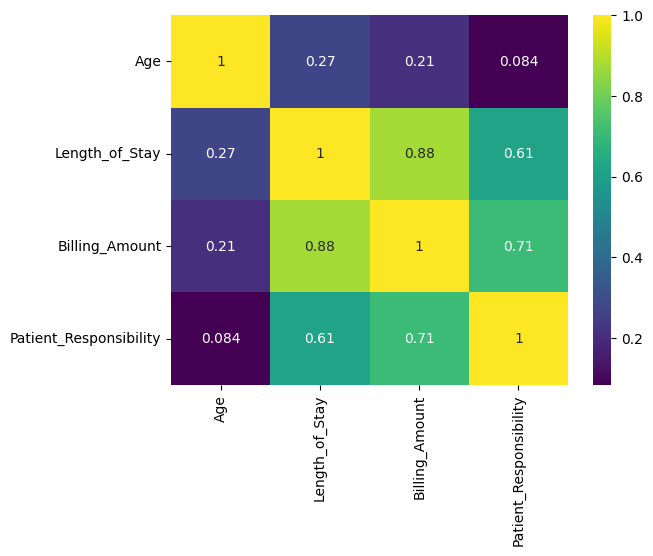

In [97]:
#Visualize the correlation between the numerical columns
sns.heatmap(correlations, annot=True, cmap='viridis')

INSIGHTS:

*   Significant correlations between the numerical variables
*   Age of patient has minimal influence on billing amount compared to length of stay
*   Length of stay has pronounce influence on the billing amount.




In [98]:
#Visualize distribution of the categorical columns
for columns in categoricals:
  fig = px.histogram(df, x= columns, text_auto = True, title= f'A visual presentation of the distribution of {columns} column')
  fig.update_layout(xaxis={'categoryorder':'total descending'})
  fig.show()

INSIGHTS:

*   Patients are uniformly distributed amongst the hospital
*   Most preferred insurance provider is Medicare
*   Majority of the cases reporting to the hospital were emergency cases








In [99]:
#Create Age bins to categorize the different ages
df['Age_groups']= pd.cut(df['Age'], bins =[0,9,19,39,59,100], labels= ['Child', 'Youth', 'Young Adult', 'Middle Aged Adult','Elderly'])

In [100]:
# Freqency of visits by Age category
age_visit=df.groupby('Age_groups')['Patient_ID'].count().rename('patient_count').reset_index()
age_visit

/tmp/ipython-input-767348686.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Age_groups  patient_count
0              Child              0
1              Youth            732
2        Young Adult           7872
3  Middle Aged Adult          13665
4            Elderly           7731

In [152]:
#Visualize the frequency of visits by Age group
fig = px.histogram(age_visit, x='Age_groups', y= 'patient_count', text_auto=True, title='Frequency of visits by Age group')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()



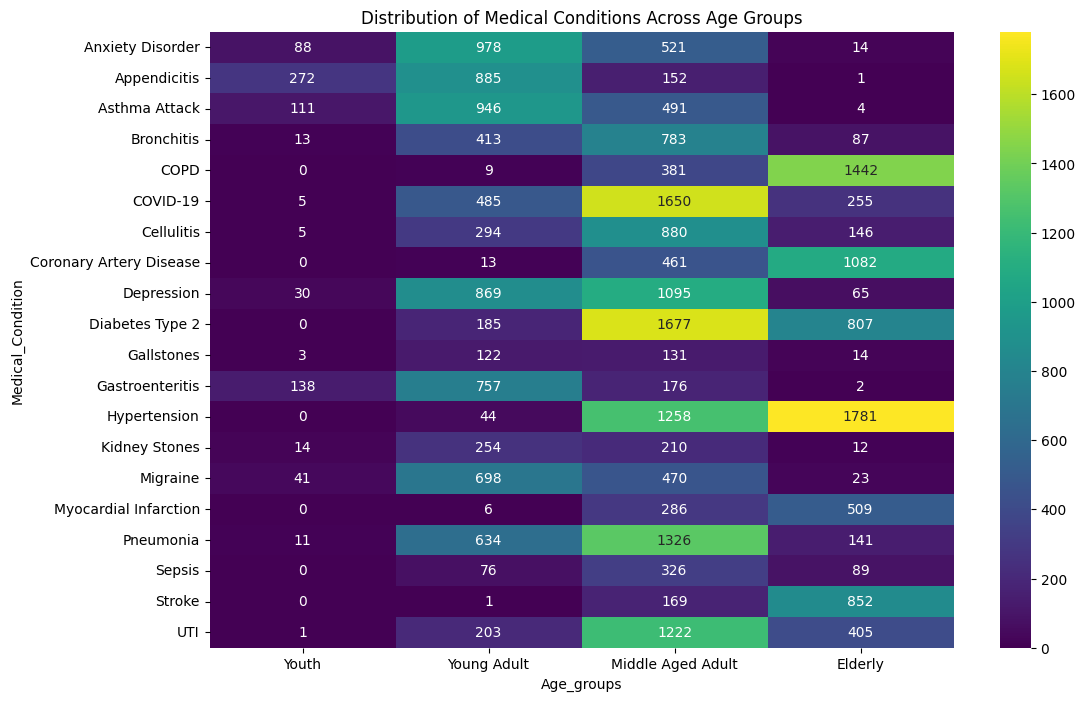

In [102]:
# Visualize distribution of medical condition in each age group
heatmap_condition_age = pd.crosstab(df['Medical_Condition'], df['Age_groups']) # This counts the number of patients for each Condition-Age_Group pair
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_condition_age, annot=True, fmt='d', cmap='viridis')
plt.title('Distribution of Medical Conditions Across Age Groups')
plt.xlabel('Age_groups')
plt.ylabel('Medical_Condition')
plt.show()





INSIGHT:

*   More middle aged people are visiting the hospital
*   Diabetes Type 2, hypertension, COVID-19,Depression, Pneumonia, UTI feature prominently in Middle aged adults
*   Hypertension, stroke, diabetes, coronary artery disease, COPD prominent amongst elderly
*   Asthma, appendicitis, anxiety disorder, gastroenteritis prominent in the youth
*   Asthma, migraine, depression, appendicitis,anxiety disorder,gastroenteritis prominent in young adults







In [103]:
#are there patients that visited the hospital more than once withing this period
df.groupby('Patient_ID').count()

Name  Age  Medical_Condition  Date_of_Admission  Discharge_Date  \
Patient_ID                                                                    
PAT100000      1    1                  1                  1               1   
PAT100001      1    1                  1                  1               1   
PAT100002      1    1                  1                  1               1   
PAT100003      1    1                  1                  1               1   
PAT100004      1    1                  1                  1               1   
...          ...  ...                ...                ...             ...   
PAT129995      1    1                  1                  1               1   
PAT129996      1    1                  1                  1               1   
PAT129997      1    1                  1                  1               1   
PAT129998      1    1                  1                  1               1   
PAT129999      1    1                  1                  1               1   

            Length_of_Stay  Doctor  Hospital  Insurance  Admission_Type  \
Patient_ID                                                                
PAT100000                1       1         1          1               1   
PAT100001                1       1         1          1               1   
PAT100002                1       1         1          1               1   
PAT100003                1       1         1          1               1   
PAT100004                1       1         1          1               1   
...                    ...     ...       ...        ...             ...   
PAT129995                1       1         1          1               1   
PAT129996                1       1         1          1               1   
PAT129997                1       1         1          1               1   
PAT129998                1       1         1          1               1   
PAT129999                1       1         1          1               1   

            Medication  Test_Result_Category  Test_Result_Description  \
Patient_ID                                                              
PAT100000            1                     1                        1   
PAT100001            1                     1                        1   
PAT100002            1                     1                        1   
PAT100003            1                     1                        1   
PAT100004            1                     1                        1   
...                ...                   ...                      ...   
PAT129995            1                     1                        1   
PAT129996            1                     1                        1   
PAT129997            1                     1                        1   
PAT129998            1                     1                        1   
PAT129999            1                     1                        1   

            Billing_Amount  Patient_Responsibility  Age_groups  
Patient_ID                                                      
PAT100000                1                       1           1  
PAT100001                1                       1           1  
PAT100002                1                       1           1  
PAT100003                1                       1           1  
PAT100004                1                       1           1  
...                    ...                     ...         ...  
PAT129995                1                       1           1  
PAT129996                1                       1           1  
PAT129997                1                       1           1  
PAT129998                1                       1           1  
PAT129999                1                       1           1  

[30000 rows x 16 columns]

Each patient ID is unique and all patients captured visited the hospital just once during this period.

In [178]:
#Effect of Age groups on billing amount
average_cost_age = round(df.groupby('Age_groups')['Billing_Amount'].mean().sort_values(ascending=False).rename('Average Cost($)').reset_index(),2)
average_cost_age

/tmp/ipython-input-413178002.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Age_groups  Average Cost($)
0            Elderly         57324.57
1  Middle Aged Adult         35652.37
2              Youth         23284.02
3        Young Adult         22836.53
4              Child              NaN

In [179]:
#visualize average cost of treatment by age groups
fig = px.bar(average_cost_age, x='Age_groups', y='Average Cost($)',text_auto=True, title='Average Cost by Age Group')
fig.show()

INSIGHTS:  

*   Elderly patients spent more on healthcare

*   Healthcare expenditure increases with age




In [180]:
#Effect of Medical conditions on average spend
average_cost_condition =round(df.groupby('Medical_Condition')['Billing_Amount'].mean().sort_values(ascending= False).rename('Average Cost($)').reset_index(),2)
average_cost_condition

Medical_Condition  Average Cost($)
0                    Sepsis        358388.71
1     Myocardial Infarction        188988.24
2                    Stroke        152403.07
3                  COVID-19         60814.63
4              Appendicitis         46474.83
5   Coronary Artery Disease         46417.82
6                      COPD         44322.62
7                 Pneumonia         43722.64
8                Gallstones         29572.15
9             Kidney Stones         20211.67
10               Cellulitis         17529.90
11          Diabetes Type 2         14144.74
12            Asthma Attack         14077.16
13               Bronchitis         12111.80
14             Hypertension          8849.22
15                      UTI          8240.00
16               Depression          8208.12
17         Anxiety Disorder          5664.39
18          Gastroenteritis          3931.02
19                 Migraine          2276.84

In [181]:
#Visualize the average cost per medical condition
fig =px.bar(average_cost_condition, x='Medical_Condition', y='Average Cost($)', text_auto =True, title ='Average Cost by Medical Condition')
fig.show()

INSIGHTS:

*   It cost more in treatment depending on the medical condition presented at the hospital

*   Sepsis is the most expensive medical condition to treat
*   Migraine is the least expensive medical condition to treat







In [182]:
#Effect of length of stay(los) on billing amount
average_cost_los =round(df.groupby('Length_of_Stay')['Billing_Amount'].mean().rename('Average Cost($)').reset_index().sort_values(by= 'Length_of_Stay', ascending= False),2)
average_cost_los

Length_of_Stay  Average Cost($)
29              30        458960.17
28              29        396135.62
27              28        452762.94
26              27        412515.33
25              26        385590.74
24              25        362594.99
23              24        336562.28
22              23        298169.50
21              22        275599.33
20              21        275672.94
19              20        235080.61
18              19        229350.55
17              18        207908.64
16              17        195348.97
15              16        178327.55
14              15        152177.91
13              14        134550.21
12              13        114773.20
11              12         97983.30
10              11         77842.57
9               10         64500.53
8                9         52647.84
7                8         42241.58
6                7         32850.84
5                6         25808.99
4                5         18890.13
3                4         13598.31
2                3          9065.38
1                2          5188.59
0                1          2218.50

In [184]:
#Visualize the average cost per length of stay
fig =px.line(average_cost_los, x='Length_of_Stay', y='Average Cost($)',  title ='Average Cost by Length of stay')
fig.show()

INSIGHT:

*   Cost of treatment increases with increasing number of days spent at the hospital




In [185]:
# Does been treated by a specific doctor for same conditions have an effect on how much it spent on treament?
average_cost_doctor_head = round(df.groupby(['Doctor','Medical_Condition'])['Billing_Amount'].mean().rename('Average Cost($)').sort_values(ascending = False).reset_index(). head(30),2)
average_cost_doctor_head

Doctor      Medical_Condition  Average Cost($)
0   Dr. Jennings                 Sepsis        669161.85
1    Dr. Everett                 Sepsis        665326.32
2    Dr. Burgess                 Sepsis        623606.58
3      Dr. Irwin                 Sepsis        600042.83
4    Dr. Rosales                 Sepsis        595182.82
5   Dr. Alvarado                 Sepsis        590335.47
6      Dr. Eaton                 Sepsis        576463.60
7    Dr. Vasquez                 Sepsis        575768.75
8     Dr. Melton                 Sepsis        574900.51
9    Dr. Patrick                 Sepsis        573302.98
10     Dr. Beard                 Sepsis        563989.97
11   Dr. Spencer                 Sepsis        562197.82
12   Dr. Maynard                 Sepsis        560940.65
13    Dr. Flores                 Sepsis        560073.74
14      Dr. Gill                 Sepsis        559491.95
15     Dr. Patel                 Sepsis        545535.95
16     Dr. Curry                 Sepsis        538039.98
17     Dr. Payne                 Sepsis        537685.78
18   Dr. Holland                 Sepsis        531499.00
19      Dr. Paul                 Sepsis        530350.72
20     Dr. Silva                 Sepsis        529008.03
21   Dr. Krueger                 Sepsis        526997.17
22   Dr. Barrett                 Sepsis        524779.30
23    Dr. Fuller                 Sepsis        524425.26
24     Dr. Riggs                 Sepsis        524312.76
25  Dr. Davidson                 Sepsis        520202.37
26    Dr. Chavez                 Sepsis        519628.07
27      Dr. Todd                 Sepsis        518821.83
28   Dr. Collins  Myocardial Infarction        516410.43
29      Dr. Gray                 Sepsis        515595.82

In [186]:
average_cost_doctor_tail = round(df.groupby(['Doctor','Medical_Condition'])['Billing_Amount'].mean().rename('Average Cost($)').sort_values(ascending = False).reset_index().tail(30),2)
average_cost_doctor_tail

Doctor Medical_Condition  Average Cost($)
11471     Dr. Sweeney  Anxiety Disorder          1108.89
11472        Dr. Roth          Migraine          1108.70
11473        Dr. Wall          Migraine          1108.26
11474    Dr. Morrison          Migraine          1106.32
11475      Dr. Patton          Migraine          1102.36
11476      Dr. Garner          Migraine          1102.18
11477     Dr. Mcguire          Migraine          1095.00
11478       Dr. Vance          Migraine          1094.96
11479     Dr. English          Migraine          1080.58
11480      Dr. Hayden          Migraine          1077.76
11481        Dr. Vega          Migraine          1074.92
11482     Dr. Fischer          Migraine          1072.68
11483       Dr. Cooke          Migraine          1064.25
11484      Dr. Bolton          Migraine          1057.01
11485      Dr. Moreno          Migraine          1053.10
11486  Dr. Washington          Migraine          1050.58
11487       Dr. Mills          Migraine          1048.64
11488      Dr. Dawson          Migraine          1013.63
11489       Dr. Rubio          Migraine          1005.25
11490    Dr. Mckinney          Migraine           997.28
11491      Dr. Fowler          Migraine           994.31
11492       Dr. Estes          Migraine           977.29
11493    Dr. Cummings          Migraine           953.38
11494     Dr. Marquez          Migraine           951.06
11495     Dr. Brennan          Migraine           936.37
11496       Dr. Drake          Migraine           925.01
11497      Dr. Stuart          Migraine           882.54
11498     Dr. Shields  Anxiety Disorder           823.89
11499        Dr. Sosa          Migraine           805.86
11500       Dr. James          Migraine           762.08

In [187]:
#Visualize how a doctor influences average cost for specific condtions top 30
fig = px.bar(average_cost_doctor_head, x='Doctor', y='Average Cost($)', color= 'Medical_Condition', text_auto=True, title='Average Cost by Doctor(top 30)')
fig.show()

In [188]:
#Visualize how a doctor influences average cost for specific condtions last 30
fig = px.bar(average_cost_doctor_tail, x='Doctor', y='Average Cost($)', color= 'Medical_Condition', text_auto=True, title='Average Cost by Doctor(last 30)')
fig.show()

INSIGHTS:

*   Choice of doctor influences how much is spent likely due to the different approaches each one may have in treatment or likely comorbidities.



In [189]:
#Effect of hospital on billing amount
average_cost_hospital = round(df.groupby('Hospital')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_hospital

Hospital  Average Cost($)
0             City General         46041.58
1         General Hospital         43341.15
2  Memorial Medical Center         40036.09
3      St. Mary's Hospital         37997.93
4       Community Hospital         30611.10
5         Regional Medical         27499.78

In [190]:
#Visualize how the choice of hospital affects the cost of treatment
fig =px.bar(average_cost_hospital, x='Hospital', y='Average Cost($)', text_auto=True, title='Average Cost by Hospital')
fig.show()



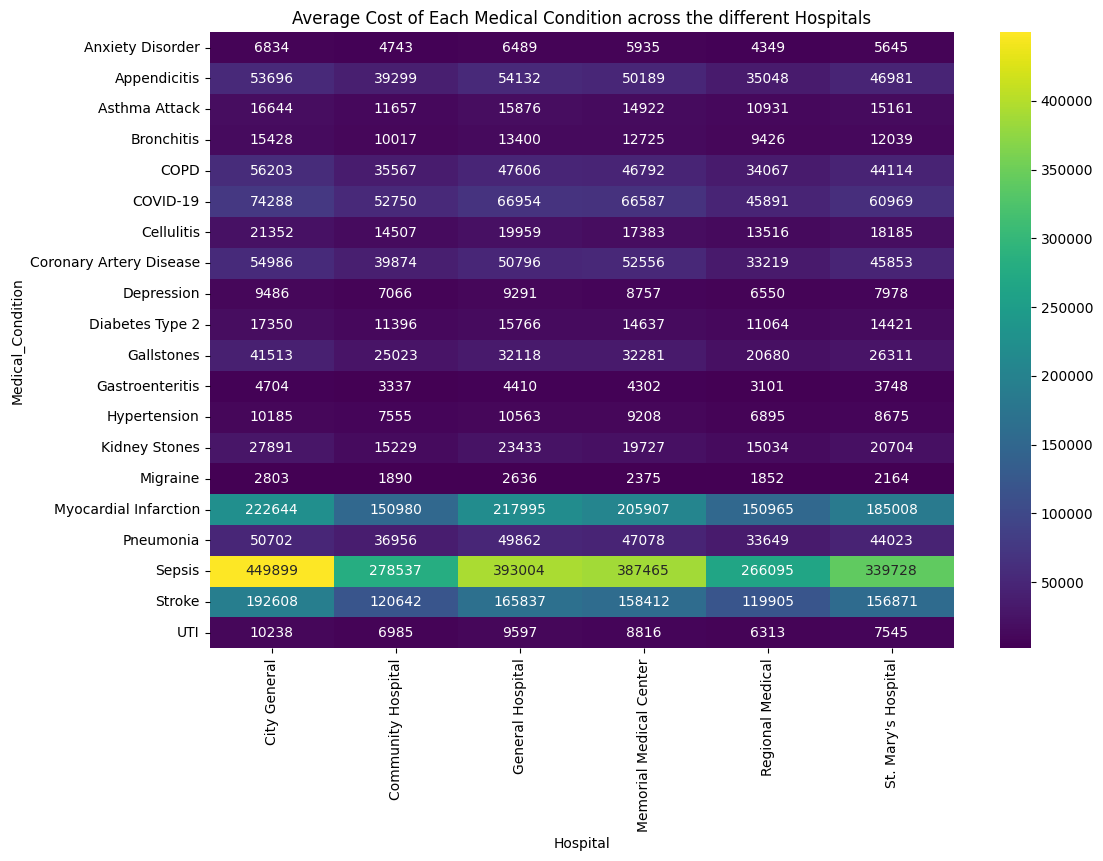

In [169]:
 #visualize the relationship between the hospitals, medical conditions and the billing amount
heatmap_hospital_condition = pd.pivot_table(df,values='Billing_Amount', index='Medical_Condition', columns='Hospital', aggfunc='mean') # This gives the average cost for each Hospital-Medical condition pair
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_hospital_condition, annot=True, fmt='.0f', cmap='viridis')
plt.title('Average Cost of Each Medical Condition across the different Hospitals')
plt.xlabel('Hospital')
plt.ylabel('Medical_Condition')
plt.show()



INSIGHTS:

*  It cost the most to get treatment from  City General hospital and the least to get treatment form  Regional Medical Hospital



In [171]:
#Create a column "Insurance cover"
df['Insurance_cover']= df['Billing_Amount'] - df['Patient_Responsibility']

In [172]:
#Create a column "Percentage insurance cover"
df['Insurance_cover_percentage']= round((df['Insurance_cover']/df['Billing_Amount'])*100,1)

In [173]:
# average insurance cover
df.groupby('Insurance')['Insurance_cover_percentage'].mean().sort_values(ascending =False)

Insurance
Aetna               90.0
Blue Cross          90.0
UnitedHealthcare    90.0
Medicaid            80.0
Medicare            80.0
No Insurance         0.0
Name: Insurance_cover_percentage, dtype: float64

In [175]:
#number of patients on each insurance
insurance_numbers= df.groupby('Insurance')['Patient_ID'].count().sort_values(ascending =False).rename('Patient count').reset_index()
insurance_numbers

Insurance  Patient count
0          Medicare           8377
1             Aetna           5585
2        Blue Cross           5484
3  UnitedHealthcare           4338
4          Medicaid           3621
5      No Insurance           2595

In [177]:
#Visualize the number of patients in each insurance
fig = px.bar(insurance_numbers, x='Insurance', y='Patient count', text_auto=True, title='Number of Patients on each Insurance')
fig.show()

In [191]:
#Effect of insurance on billing amount
average_cost_insurance = round(df.groupby('Insurance')['Insurance_cover'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_insurance

Insurance  Average Cost($)
0          Medicaid         45949.51
1          Medicare         39368.17
2  UnitedHealthcare         26428.56
3        Blue Cross         26351.46
4             Aetna         25167.38
5      No Insurance             0.00

In [192]:
#Visualize how the choice of insurance provider affects the cost of treatment
fig =px.bar(average_cost_insurance, x='Insurance', y='Average Cost($)', text_auto=True, title='Average Cost by Insurance Provider')
fig.show()

INSIGHTS:

*  There is a significant number of people(2595) who do not have insurance and have to pay their total bills out of pocket
*   Medicaid insurance pays the highest bills for patients

*   Despite Medicare having an insurance cover of 80% it has the most patients on it.
*   Medicaid has an insurance cover of 80% ,pays the highest bills and has the least number of patients on it





In [195]:
# Effect of Admission type on billing amount
average_cost_admission = round(df.groupby('Admission_Type')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_admission

Admission_Type  Average Cost($)
0      Emergency         41365.57
1         Urgent         34782.80
2       Elective         32180.73

In [196]:
#Visualize the effect of Admission type on average cost of treatment
fig =px.bar(average_cost_admission, x='Admission_Type', y='Average Cost($)', text_auto=True, title='Average Cost by Admission Type')
fig.show()

INSIGHTS:

*   Emergency admissions are more expensive than urgent and elective admissions. Cost decreases in same pecking order.





In [197]:
# Effect of Medication on billing amount
average_cost_medication = round(df.groupby('Medication')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_medication

Medication  Average Cost($)
0      Vancomycin        358388.71
1     Clopidogrel        188988.24
2         Aspirin        152403.07
3      Remdesivir         60814.63
4       Cefoxitin         46474.83
5    Atorvastatin         46417.82
6       Albuterol         44322.62
7    Azithromycin         43722.64
8        Ursodiol         29572.15
9       Ketorolac         20211.67
10     Cephalexin         17529.90
11      Metformin         14144.74
12     Prednisone         14077.16
13    Doxycycline         12111.80
14     Lisinopril          8849.22
15  Ciprofloxacin          8240.00
16     Sertraline          8208.12
17     Alprazolam          5664.39
18    Ondansetron          3931.02
19    Sumatriptan          2276.84

In [198]:
#Visualize effect of Medication on average cost of treatment
fig =px.bar(average_cost_medication, x='Medication', y='Average Cost($)', text_auto=True, title='Average Cost by Medication')
fig.show()

In [201]:
# Effect of Test results on billing amount
average_cost_test = round(df.groupby('Test_Result_Category')['Billing_Amount'].mean().sort_values(ascending =False).rename('Average Cost($)').reset_index(),2)
average_cost_test

Test_Result_Category  Average Cost($)
0             Critical        113163.01
1             Abnormal         23528.68
2               Normal          8483.17

In [202]:
#Visualize effect of test results on average cost of treatment
fig =px.bar(average_cost_test, x='Test_Result_Category', y='Average Cost($)', text_auto=True, title='Average Cost by Test Results')
fig.show()

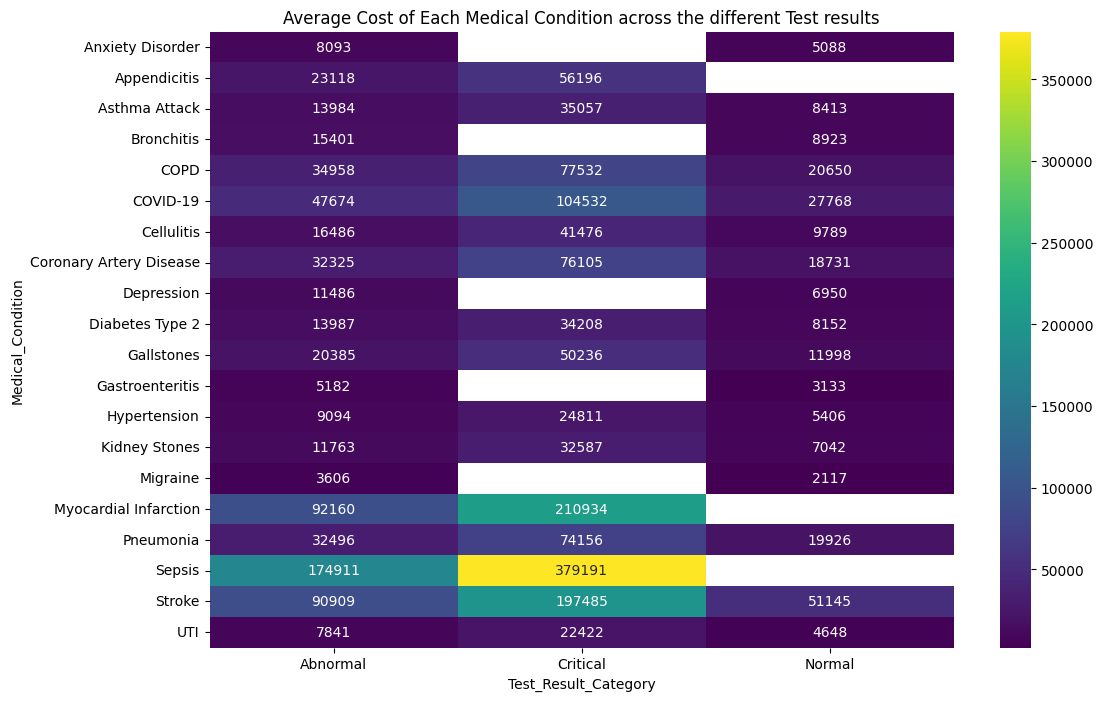

In [203]:
 # Relationship between medical condition, test results and billing amount
heatmap_tests_condition_cost = pd.pivot_table(df,values='Billing_Amount', index='Medical_Condition', columns='Test_Result_Category', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_tests_condition_cost, annot=True, fmt='.0f', cmap='viridis') # Visualize the relationship between tests results and average cost across different medical conditions
plt.title('Average Cost of Each Medical Condition across the different Test results')
plt.xlabel('Test_Result_Category')
plt.ylabel('Medical_Condition')
plt.show()

INSIGHTS:


*   It is expensive to treat critical conditions

*   Critical test results predominatly consists of conditions that are expensive to treat so we observe the high average cost
*   It is followed by Abnormal and the normal test results



In [132]:
#Effect of age on test results
age_group_test= df.groupby('Age_groups')['Test_Result_Category'].value_counts().rename('Test_Result_count'). reset_index()
age_group_test

/tmp/ipython-input-3547562668.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Age_groups Test_Result_Category  Test_Result_count
0               Child             Abnormal                  0
1               Child             Critical                  0
2               Child               Normal                  0
3               Youth               Normal                273
4               Youth             Abnormal                239
5               Youth             Critical                220
6         Young Adult               Normal               3533
7         Young Adult             Abnormal               2991
8         Young Adult             Critical               1348
9   Middle Aged Adult             Abnormal               6339
10  Middle Aged Adult               Normal               4704
11  Middle Aged Adult             Critical               2622
12            Elderly             Abnormal               3356
13            Elderly             Critical               2289
14            Elderly               Normal               2086

In [133]:
#Visualize the influence of age on the test results
fig =px.bar(age_group_test, x='Age_groups', y='Test_Result_count', color='Test_Result_Category', text_auto=True, title='Influnce of Age on Test Results')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#Visuals of the influence of age on test results expressed as a percentage
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Influence of Age on Test Results (percentage)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()

INSIGHT:

*   Young adults have the highest proportion of it's group having normal results
*   Youth has the highest proportion of it's group having critical results
*   Middle age has the highest proportion having abnormal results





In [134]:
#Effect of medical condition on test results
condition_test = df.groupby('Medical_Condition')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
condition_test

Medical_Condition Test_Result_Category  Test_Result_count
0          Anxiety Disorder               Normal               1294
1          Anxiety Disorder             Abnormal                307
2              Appendicitis             Critical                925
3              Appendicitis             Abnormal                385
4             Asthma Attack             Abnormal                784
5             Asthma Attack               Normal                602
6             Asthma Attack             Critical                166
7                Bronchitis               Normal                658
8                Bronchitis             Abnormal                638
9                      COPD             Abnormal                924
10                     COPD             Critical                530
11                     COPD               Normal                378
12                 COVID-19             Abnormal               1184
13                 COVID-19             Critical                724
14                 COVID-19               Normal                487
15               Cellulitis             Abnormal                907
16               Cellulitis               Normal                286
17               Cellulitis             Critical                132
18  Coronary Artery Disease             Abnormal                641
19  Coronary Artery Disease             Critical                599
20  Coronary Artery Disease               Normal                316
21               Depression               Normal               1488
22               Depression             Abnormal                571
23          Diabetes Type 2             Abnormal               1589
24          Diabetes Type 2               Normal                822
25          Diabetes Type 2             Critical                258
26               Gallstones             Abnormal                160
27               Gallstones             Critical                 89
28               Gallstones               Normal                 21
29          Gastroenteritis               Normal                655
30          Gastroenteritis             Abnormal                418
31             Hypertension               Normal               1564
32             Hypertension             Abnormal               1200
33             Hypertension             Critical                319
34            Kidney Stones             Abnormal                236
35            Kidney Stones             Critical                209
36            Kidney Stones               Normal                 45
37                 Migraine               Normal               1100
38                 Migraine             Abnormal                132
39    Myocardial Infarction             Critical                653
40    Myocardial Infarction             Abnormal                148
41                Pneumonia             Abnormal               1276
42                Pneumonia             Critical                631
43                Pneumonia               Normal                205
44                   Sepsis             Critical                441
45                   Sepsis             Abnormal                 50
46                   Stroke             Critical                627
47                   Stroke             Abnormal                295
48                   Stroke               Normal                100
49                      UTI             Abnormal               1080
50                      UTI               Normal                575
51                      UTI             Critical                176

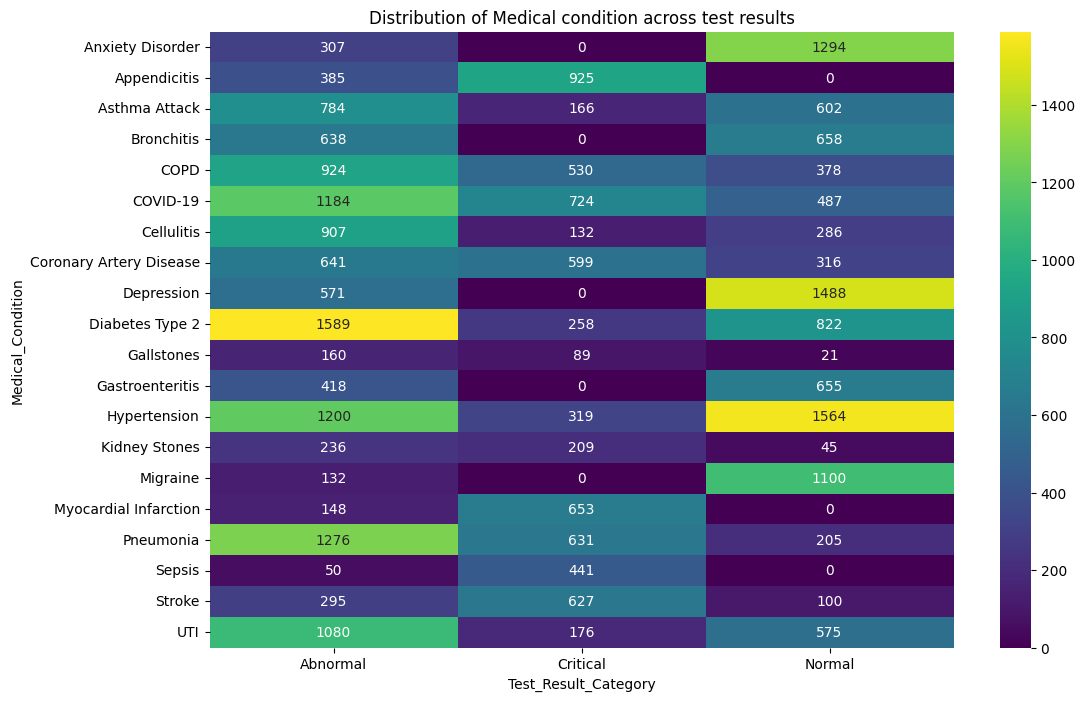

In [136]:
 #visualize the relationship between medical condition on test results
heatmap_tests_condition_result = pd.crosstab(df['Medical_Condition'], df['Test_Result_Category']) # This gives the count of patients for each Test result-Medical condition pair
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_tests_condition_result, annot=True, fmt='d', cmap='viridis') # Visualize the relationship between tests results and different medical conditions
plt.title('Distribution of Medical condition across test results')
plt.xlabel('Test_Result_Category')
plt.ylabel('Medical_Condition')
plt.show()

INSIGHT:

*   Abnormal results dominate across most conditions, particularly for chronic and infectious diseases such as Diabetes Type 2, Hypertension, Pneumonia, COVID-19, and UTI.
*   Critical results are concentrated in acute, life-threatening conditions, including Appendicitis, Myocardial Infarction, Stroke, Sepsis, and Pneumonia


In [137]:
#Effect of length of stay (los) on test results
los_test = df.groupby('Length_of_Stay')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
los_test

Length_of_Stay Test_Result_Category  Test_Result_count
0                1               Normal               1131
1                1             Abnormal                259
2                1             Critical                 23
3                2               Normal               2313
4                2             Abnormal               1025
..             ...                  ...                ...
66              27             Abnormal                  2
67              28             Critical                 24
68              29             Critical                 25
69              29             Abnormal                  1
70              30             Critical                112

[71 rows x 3 columns]

In [139]:
# visualize the progression of condition relative to length of stay
fig= px.line(los_test, x='Length_of_Stay', y= 'Test_Result_count' , color='Test_Result_Category', title='Test Results by Length of Stay')
fig.show()

INSIGHTS:

* Normal test results are associated with shorter hospital stays, peaking around 2 - 4 days, and decline sharply thereafter. This suggests quicker diagnosis, treatment, and discharge.


* Abnormal results peak slightly later (around 4-6 days) and show a longer tail, indicating moderate severity and requiring extended monitoring or treatment.


* Critical test results are strongly associated with prolonged length of stay, with extended distribution that persists beyond 10 - 20 days, reflecting higher severity.




In [140]:
#Effect of hospital on test results
hospital_test = df.groupby('Hospital')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
hospital_test

Hospital Test_Result_Category  Test_Result_count
0              City General             Abnormal               2049
1              City General               Normal               1799
2              City General             Critical               1090
3        Community Hospital             Abnormal               2201
4        Community Hospital               Normal               1739
5        Community Hospital             Critical               1036
6          General Hospital             Abnormal               2223
7          General Hospital               Normal               1788
8          General Hospital             Critical               1099
9   Memorial Medical Center             Abnormal               2099
10  Memorial Medical Center               Normal               1762
11  Memorial Medical Center             Critical               1056
12         Regional Medical             Abnormal               2211
13         Regional Medical               Normal               1771
14         Regional Medical             Critical               1071
15      St. Mary's Hospital             Abnormal               2142
16      St. Mary's Hospital               Normal               1737
17      St. Mary's Hospital             Critical               1127

In [141]:
#visualize the hospital on test results
fig= px.bar(hospital_test, x='Hospital', y= 'Test_Result_count' , color='Test_Result_Category', text_auto=True, title='Test Results by hospital')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


# Visualize the effect of hospital on test results as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Test Results by Hospital (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHTS:

*   There is an almost uniform distribution of test results across the different hospitals, indicative of similar healthcare standards or protocols in all the facilities.



In [142]:
#Relationship between insurance and test results
Insurance_test = df.groupby('Insurance')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
Insurance_test

Insurance Test_Result_Category  Test_Result_count
0              Aetna             Abnormal               2599
1              Aetna               Normal               2213
2              Aetna             Critical                773
3         Blue Cross             Abnormal               2601
4         Blue Cross               Normal               2086
5         Blue Cross             Critical                797
6           Medicaid             Critical               1736
7           Medicaid             Abnormal                982
8           Medicaid               Normal                903
9           Medicare             Abnormal               3691
10          Medicare               Normal               2617
11          Medicare             Critical               2069
12      No Insurance               Normal               1080
13      No Insurance             Abnormal               1040
14      No Insurance             Critical                475
15  UnitedHealthcare             Abnormal               2012
16  UnitedHealthcare               Normal               1697
17  UnitedHealthcare             Critical                629

In [143]:
#visualize the relationship between insurance and test results
fig= px.bar(Insurance_test, x='Insurance', y= 'Test_Result_count' , color='Test_Result_Category', text_auto=True, title='Test Results by insurance')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


# Visualize the relationship between insurance and test results as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Test Results by Insurance (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHTS:

* Medicaid patients show the highest proportion of critical test results (47.9%)
* Medicare patients have a more balanced distribution, with substantial abnormal (44.1%) and normal (31.2%) results, and a moderate critical share (~24.7%)

* Uninsured patients show elevated normal and abnormal proportions, which may indicate delayed presentation until conditions worsen






In [144]:
#Effect of type of admission on test results
admission_test = df.groupby('Admission_Type')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
admission_test

Admission_Type Test_Result_Category  Test_Result_count
0       Elective             Abnormal               2557
1       Elective               Normal               2102
2       Elective             Critical               1331
3      Emergency             Abnormal               6459
4      Emergency               Normal               5394
5      Emergency             Critical               3229
6         Urgent             Abnormal               3909
7         Urgent               Normal               3100
8         Urgent             Critical               1919

In [145]:
#visualize the effect of type of admission  on test results
fig= px.bar(admission_test, x='Admission_Type', y= 'Test_Result_count' , color='Test_Result_Category', text_auto=True, title='Test Results by admission type')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


# Visualize the effect of type of admission on test results as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Test Results by admission type (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHT:
*   Type of admission does not influence the test results. Healthcare provision is standardized.




In [146]:
#Effect of type of medication on test results
medication_test = df.groupby('Medication')['Test_Result_Category'].value_counts().rename('Test_Result_count').reset_index()
medication_test

Medication Test_Result_Category  Test_Result_count
0       Albuterol             Abnormal                924
1       Albuterol             Critical                530
2       Albuterol               Normal                378
3      Alprazolam               Normal               1294
4      Alprazolam             Abnormal                307
5         Aspirin             Critical                627
6         Aspirin             Abnormal                295
7         Aspirin               Normal                100
8    Atorvastatin             Abnormal                641
9    Atorvastatin             Critical                599
10   Atorvastatin               Normal                316
11   Azithromycin             Abnormal               1276
12   Azithromycin             Critical                631
13   Azithromycin               Normal                205
14      Cefoxitin             Critical                925
15      Cefoxitin             Abnormal                385
16     Cephalexin             Abnormal                907
17     Cephalexin               Normal                286
18     Cephalexin             Critical                132
19  Ciprofloxacin             Abnormal               1080
20  Ciprofloxacin               Normal                575
21  Ciprofloxacin             Critical                176
22    Clopidogrel             Critical                653
23    Clopidogrel             Abnormal                148
24    Doxycycline               Normal                658
25    Doxycycline             Abnormal                638
26      Ketorolac             Abnormal                236
27      Ketorolac             Critical                209
28      Ketorolac               Normal                 45
29     Lisinopril               Normal               1564
30     Lisinopril             Abnormal               1200
31     Lisinopril             Critical                319
32      Metformin             Abnormal               1589
33      Metformin               Normal                822
34      Metformin             Critical                258
35    Ondansetron               Normal                655
36    Ondansetron             Abnormal                418
37     Prednisone             Abnormal                784
38     Prednisone               Normal                602
39     Prednisone             Critical                166
40     Remdesivir             Abnormal               1184
41     Remdesivir             Critical                724
42     Remdesivir               Normal                487
43     Sertraline               Normal               1488
44     Sertraline             Abnormal                571
45    Sumatriptan               Normal               1100
46    Sumatriptan             Abnormal                132
47       Ursodiol             Abnormal                160
48       Ursodiol             Critical                 89
49       Ursodiol               Normal                 21
50     Vancomycin             Critical                441
51     Vancomycin             Abnormal                 50

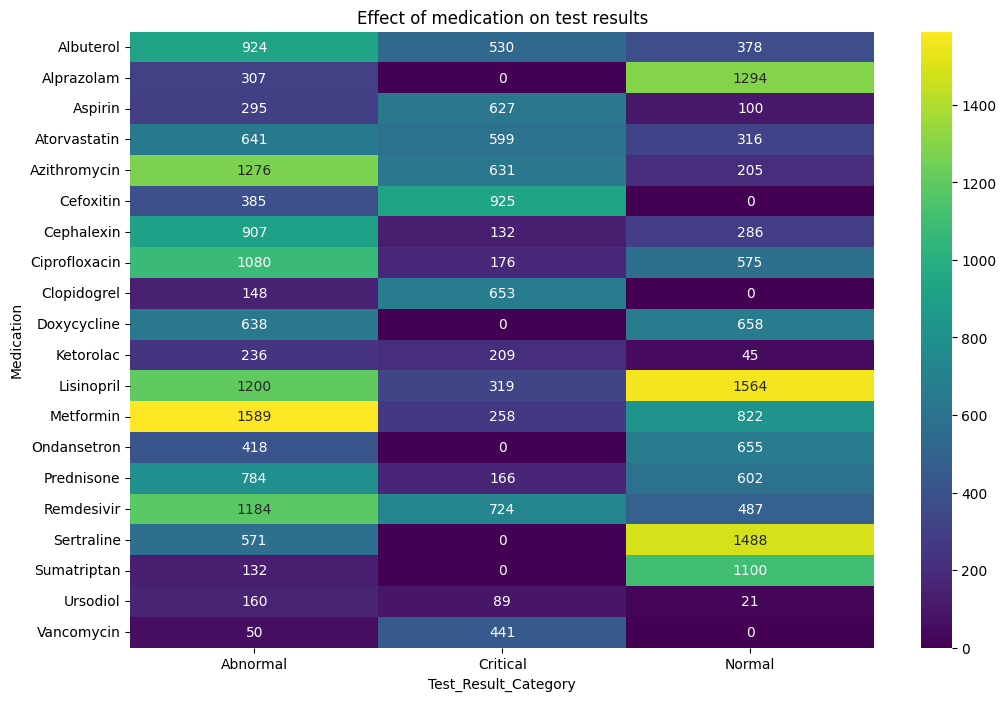

In [148]:
 # Visualize the relationship between tests results and medication
heatmap_tests_medication = pd.crosstab(df['Medication'], df['Test_Result_Category'])
sns.heatmap(heatmap_tests_medication, annot=True, fmt='d', cmap='viridis')
plt.title('Effect of medication on test results')
plt.xlabel('Test_Result_Category')
plt.ylabel('Medication')
plt.show()

In [149]:
#Medical condition vrs admission type
condition_admission = df.groupby('Medical_Condition')['Admission_Type'].value_counts().rename('Patient_count').reset_index()
condition_admission

Medical_Condition Admission_Type  Patient_count
0          Anxiety Disorder      Emergency            758
1          Anxiety Disorder         Urgent            527
2          Anxiety Disorder       Elective            316
3              Appendicitis      Emergency            645
4              Appendicitis         Urgent            396
5              Appendicitis       Elective            269
6             Asthma Attack      Emergency            762
7             Asthma Attack         Urgent            459
8             Asthma Attack       Elective            331
9                Bronchitis      Emergency            652
10               Bronchitis         Urgent            386
11               Bronchitis       Elective            258
12                     COPD      Emergency            886
13                     COPD         Urgent            566
14                     COPD       Elective            380
15                 COVID-19      Emergency           1174
16                 COVID-19         Urgent            733
17                 COVID-19       Elective            488
18               Cellulitis      Emergency            684
19               Cellulitis         Urgent            369
20               Cellulitis       Elective            272
21  Coronary Artery Disease      Emergency            778
22  Coronary Artery Disease         Urgent            433
23  Coronary Artery Disease       Elective            345
24               Depression      Emergency           1031
25               Depression         Urgent            590
26               Depression       Elective            438
27          Diabetes Type 2      Emergency           1348
28          Diabetes Type 2         Urgent            816
29          Diabetes Type 2       Elective            505
30               Gallstones      Emergency            134
31               Gallstones         Urgent             79
32               Gallstones       Elective             57
33          Gastroenteritis      Emergency            516
34          Gastroenteritis         Urgent            332
35          Gastroenteritis       Elective            225
36             Hypertension      Emergency           1595
37             Hypertension         Urgent            887
38             Hypertension       Elective            601
39            Kidney Stones      Emergency            252
40            Kidney Stones         Urgent            148
41            Kidney Stones       Elective             90
42                 Migraine      Emergency            648
43                 Migraine         Urgent            374
44                 Migraine       Elective            210
45    Myocardial Infarction      Emergency            408
46    Myocardial Infarction         Urgent            245
47    Myocardial Infarction       Elective            148
48                Pneumonia      Emergency           1075
49                Pneumonia         Urgent            620
50                Pneumonia       Elective            417
51                   Sepsis      Emergency            259
52                   Sepsis         Urgent            133
53                   Sepsis       Elective             99
54                   Stroke      Emergency            551
55                   Stroke         Urgent            288
56                   Stroke       Elective            183
57                      UTI      Emergency            926
58                      UTI         Urgent            547
59                      UTI       Elective            358

In [150]:
#visualize medical conditions and the type of admissions
fig= px.bar(condition_admission, x='Medical_Condition', y= 'Patient_count' , color='Admission_Type', text_auto=True, title='Medical condition against admission type')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# Visualize medical conditions and the type of admissions as percentages
fig.update_layout(xaxis={'categoryorder':'total descending'}, barnorm='percent', title ='Medical condition against admission type (Percentages)')
fig.update_yaxes(title_text="Percent", tickformat= '.1f')
fig.show()


INSIGHTS:

*  Chronic disease medications such as Metformin, Lisinopril, and Atorvastatin are associated with high volumes of abnormal and normal results


*  Antibiotics and antivirals (e.g., Azithromycin, Ciprofloxacin, Vancomycin, Remdesivir) show higher proportions of critical and abnormal results, consistent with their use in acute and severe infections





**RESEARCH QUESTIONS ANSWERED**

---





1.   Does medical conditions affect billing amount?

   

*   *Yes it does, billing amount varied with different medical conditions*


2.   Does healthcare facilty influence billing amount?


*  *Yes it does. Across different hospitals but medical condition remaining the same, the billing varied with some hospitals having almost a 69% increase in billing amount*


3.   Does type of admission affect billing amount?


*   *Yes it does. Protocols differ for the different type of admissions and this determines how much is paid*


4.   Which demographic group incur higher medical expense?


*   *Elderly patients i.e. those who are 60 years and above have a higher medical expenditure*


5.   What recommendations can be made to reduce treatment cost?


*   *Visit a hospital at the onset of any condition, do not wait till it's an emergency. Delay may increase your expenses*
*   *Choose a hospital that best fits your financial strength e.g Regional Hospital charges the least compared to City General hospital*

*   *Subscribe to a health insurance*
*   *Be health conscious(exercise, eat well, rest properly, etc)*


6.   Does medical condition, medication, age, length of hospital stay influence test results?


*   *The kind of medical condition presented does not influence test results*
*   *Age has an influence on test results as younger people generally may recover faster compared to older people*


*   *The test result may influence how a patient stays in the hospital*


7.   Are certain medical conditions  more prone to poor test outcomes?
  

*   *Yes there is. Risk groups that have a significant portion of patients having either abnormal or critical results are Sepsis,   Myocardial Infarction, Appendicitis, Stroke, Kidney stones, Coronary Artery Disease*














**RECOMMENDATION**


* Preventive care focus: The middle aged, young adult and elderly represent demographic groups with the highest number of hospital visits. A targeted public health campaigned focused on this group may help promote healthier lifestyles  
* Comprehensive health insurance education guide for the uninsured



**CONCLUSION**

* Sepsis, Myocardial infarction and stroke are the most expensive conditions with sepsis averaging billing amount of approximately 358000 per case. Implementation of early warning sign systems will catch the conditions early and help reduce cost and improve patient outcome

* Significant variance in treatment costs exists, with City General charging 69% more for Sepsis than Regional Medical. Investigate the drivers behind the 69% price gap—whether due to higher complication rates, longer lengths of stay, or administrative overhead.

* High volume cases are being treated via emergency admissions, that is about 50% of cases. This is indicative of poor primary care management leading to preventable high cost emergency visits. Transition from a reactive "Emergency-first" model to a proactive "Primary care-first" model.


* Patients with no insurance are paying for all their bills out-of-pocket. Proactively identify uninsured patients upon admission and educate and guide them on the need for a health insurance








